In [124]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import pandas as pd
import plotly.express as px
import seaborn as sns

In [125]:
df=pd.read_excel(r"D:\attribution_data.xlsx")

In [126]:
pd.set_option('max_columns',None)

In [127]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [129]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [130]:
df.isna().sum().sort_values(ascending= False)

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

In [133]:
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis

In [140]:
skew(df["Age"].dropna())

0.41286446154785084

<AxesSubplot:>

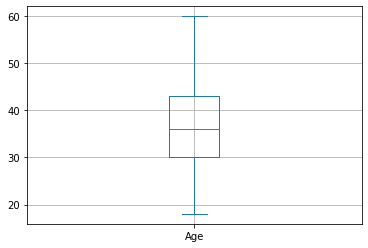

In [154]:
bp=pd.DataFrame(df, columns=['Age'])
bp.plot.box(grid='True')
 

In [156]:
skew(df["Education"].dropna())

-0.2893854052028825

<AxesSubplot:>

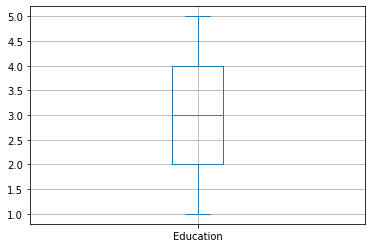

In [157]:
bp=pd.DataFrame(df, columns=['Education'])
bp.plot.box(grid='True')

<AxesSubplot:>

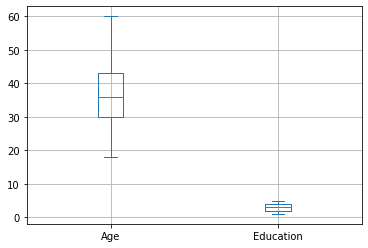

In [159]:
bp=pd.DataFrame(df, columns=['Age','Education'])
bp.plot.box(grid='True')

In [137]:
skew(df["DailyRate"].dropna())

-0.003514976958291024

In [ ]:
skew(df["DailyRate"].dropna())

In [64]:
px.histogram(df,x='EducationField')

In [67]:
px.histogram(df,x='MonthlyIncome')

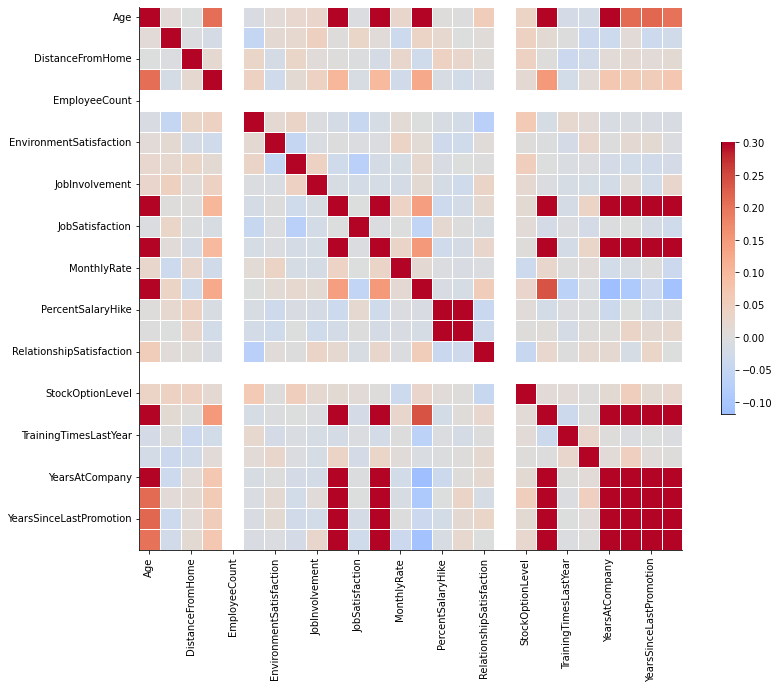

In [70]:
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

<AxesSubplot:ylabel='Attrition'>

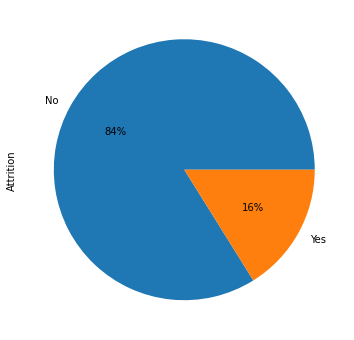

In [26]:
df.Attrition.value_counts().plot(kind='pie',
                                                autopct='%1.0f%%',
                                               figsize=(8, 6))

<AxesSubplot:xlabel='Age'>

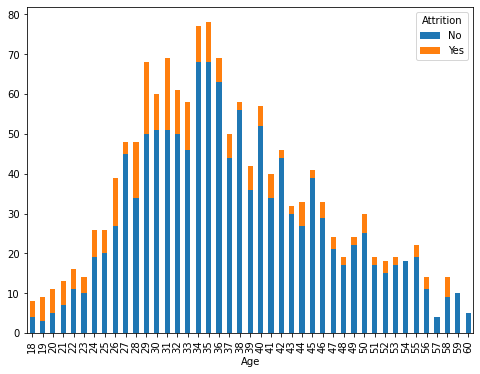

In [28]:
df.groupby(['Age', 'Attrition']).size().unstack().plot(kind='bar',
                                                                                stacked=True,
                                                                               figsize=(8, 6))

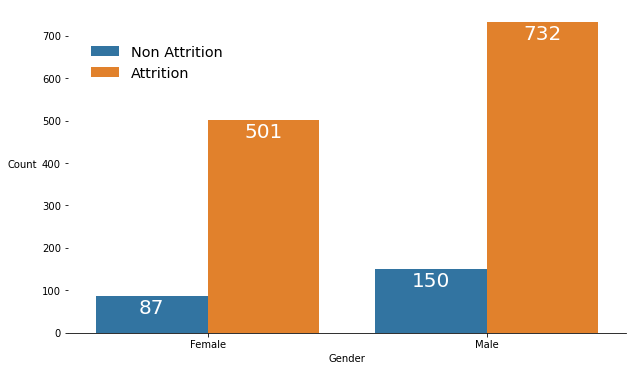

Female Attrition percentage & count
-------------------------
No     85.2
Yes    14.8
Name: Attrition, dtype: float64
No     501
Yes     87
Name: Attrition, dtype: int64
_________________________

Male Attrition percentage & count
-------------------------
No     82.99
Yes    17.01
Name: Attrition, dtype: float64
No     732
Yes    150
Name: Attrition, dtype: int64
_________________________


In [161]:
plt.figure(figsize=(10,6))
fig = sns.countplot(x='Gender', hue='Attrition', data=df)
sns.despine(left=True)
fig.set_xlabel('Gender', fontsize=10)
plt.xticks(fontsize=10)
fig.set_ylabel('Count', fontsize=10, rotation=0)
fig.yaxis.labelpad = 20
plt.yticks(fontsize=10)
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-50), ha='center', va='bottom', fontsize=20, color='white')
plt.legend(labels =['Non Attrition','Attrition'],fontsize='x-large', bbox_to_anchor=(0.03, 0.9), loc=2, borderaxespad=0., frameon=0)
plt.show()

print('Female Attrition percentage & count')
print('-'*25)
print(round(df[df.Gender == 'Female'].Attrition.value_counts(normalize=True)*100,2))
print(df[df.Gender == 'Female'].Attrition.value_counts())
print('_'*25)
print(''*25)
print('Male Attrition percentage & count')
print('-'*25)
print(round(df[df.Gender == 'Male'].Attrition.value_counts(normalize=True)*100,2))
print(df[df.Gender == 'Male'].Attrition.value_counts())
print('_'*25)

In [162]:
feature_set =  df.drop(['Attrition'], axis=1)
labels = df.filter(['Attrition'], axis=1)

In [163]:
feature_set.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [164]:
cat_col_names = ['BusinessTravel',
                       'Department',
                       'EducationField',
                       'Gender',
                       'JobRole',
                       'MaritalStatus',
                       'Over18',
                       'OverTime'
                      ]

In [165]:
num_cols = feature_set.drop(cat_col_names, axis=1)
cat_columns = feature_set.filter(cat_col_names, axis = 1)

In [166]:
cat_columns_one_hot = pd.get_dummies(cat_columns, drop_first=True)
cat_columns_one_hot.shape

(1470, 21)

In [219]:
y =  labels['Attrition'].map({'Yes': 1, 'No': 0})
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [167]:
X = pd.concat([num_cols,cat_columns_one_hot], axis=1)
X.shape

(1470, 47)

In [168]:
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [196]:
Z=X.T

In [197]:
Z

0      1     2      3      4      5     \
Age                                   41     49    37     33     27     32   
DailyRate                           1102    279  1373   1392    591   1005   
DistanceFromHome                       1      8     2      3      2      2   
Education                              2      1     2      4      1      2   
EmployeeCount                          1      1     1      1      1      1   
EmployeeNumber                         1      2     4      5      7      8   
EnvironmentSatisfaction                2      3     4      4      1      4   
HourlyRate                            94     61    92     56     40     79   
JobInvolvement                         3      2     2      3      3      3   
JobLevel                               2      2     1      1      1      1   
JobSatisfaction                        4      2     3      3      2      4   
MonthlyIncome                       5993   5130  2090   2909   3468   3068   
MonthlyRate                        19479  24907  2396  23159  16632  11864   
NumCompaniesWorked                     8      1     6      1      9      0   
PercentSalaryHike                     11     23    15     11     12     13   
PerformanceRating                      3      4     3      3      3      3   
RelationshipSatisfaction               1      4     2      3      4      3   
StandardHours                         80     80    80     80     80     80   
StockOptionLevel                       0      1     0      0      1      0   
TotalWorkingYears                      8     10     7      8      6      8   
TrainingTimesLastYear                  0      3     3      3      3      2   
WorkLifeBalance                        1      3     3      3      3      2   
YearsAtCompany                         6     10     0      8      2      7   
YearsInCurrentRole                     4      7     0      7      2      7   
YearsSinceLastPromotion                0      1     0      3      2      3   
YearsWithCurrManager                   5      7     0      0      2      6   
BusinessTravel_Travel_Frequently       0      1     0      1      0      1   
BusinessTravel_Travel_Rarely           1      0     1      0      1      0   
Department_Research & Development      0      1     1      1      1      1   
Department_Sales                       1      0     0      0      0      0   
EducationField_Life Sciences           1      1     0      1      0      1   
EducationField_Marketing               0      0     0      0      0      0   
EducationField_Medical                 0      0     0      0      1      0   
EducationField_Other                   0      0     1      0      0      0   
EducationField_Technical Degree        0      0     0      0      0      0   
Gender_Male                            0      1     1      0      1      1   
JobRole_Human Resources                0      0     0      0      0      0   
JobRole_Laboratory Technician          0      0     1      0      1      1   
JobRole_Manager                        0      0     0      0      0      0   
JobRole_Manufacturing Director         0      0     0      0      0      0   
JobRole_Research Director              0      0     0      0      0      0   
JobRole_Research Scientist             0      1     0      1      0      0   
JobRole_Sales Executive                1      0     0      0      0      0   
JobRole_Sales Representative           0      0     0      0      0      0   
MaritalStatus_Married                  0      1     0      1      1      0   
MaritalStatus_Single                   1      0     1      0      0      1   
OverTime_Yes                           1      0     1      1      0      0   

                                   6      7     8      9      10     11    \
Age                                  59     30    38     36     35     29   
DailyRate                          1324   1358   216   1299    809    153   
DistanceFromHome                      3     24    23     27 

In [209]:
W=Z.skew(axis = 1, skipna = True)

In [210]:
W

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EmployeeCount                        0.000000
EmployeeNumber                       0.016574
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StandardHours                        0.000000
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                   

In [275]:
import scipy.stats as stats

In [221]:
len(W)

47

In [212]:
df2=pd.DataFrame(W)

In [217]:
df2

,0
Age,0.413286
DailyRate,-0.003519
DistanceFromHome,0.958118
Education,-0.289681
EmployeeCount,0.000000
EmployeeNumber,0.016574
EnvironmentSatisfaction,-0.321654
HourlyRate,-0.032311
JobInvolvement,-0.498419
JobLevel,1.025401


In [277]:
stats.zscore(df2)

,0
Age,-0.472304
DailyRate,-0.778506
DistanceFromHome,-0.072049
Education,-0.988732
EmployeeCount,-0.775921
EmployeeNumber,-0.763745
EnvironmentSatisfaction,-1.012221
HourlyRate,-0.799658
JobInvolvement,-1.142079
JobLevel,-0.022620


In [218]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df2)

print(normalized_data)

[[0.2243895 ]
 [0.15445144]
 [0.3158099 ]
 [0.1064346 ]
 [0.15504184]
 [0.15782289]
 [0.10106961]
 [0.1496202 ]
 [0.07140922]
 [0.32709975]
 [0.09972431]
 [0.38489116]
 [0.15815912]
 [0.32727926]
 [0.29282357]
 [0.47752546]
 [0.10422868]
 [0.15504184]
 [0.31763255]
 [0.34249845]
 [0.24785369]
 [0.06233803]
 [0.45112226]
 [0.30897142]
 [0.48799713]
 [0.29489132]
 [0.42268716]
 [0.        ]
 [0.04648876]
 [0.29870146]
 [0.21493136]
 [0.57885737]
 [0.28829134]
 [0.80527005]
 [0.63705243]
 [0.08646955]
 [1.        ]
 [0.44056365]
 [0.72430734]
 [0.60722497]
 [0.81488876]
 [0.40878477]
 [0.38002799]
 [0.80058399]
 [0.18348051]
 [0.28489461]
 [0.31687891]]


In [246]:
scaler.scale_

array([0.16779568])

In [248]:
scaled_data=scaler.transform(df2)

In [253]:
scaled_data

array([[0.2243895 ],
       [0.15445144],
       [0.3158099 ],
       [0.1064346 ],
       [0.15504184],
       [0.15782289],
       [0.10106961],
       [0.1496202 ],
       [0.07140922],
       [0.32709975],
       [0.09972431],
       [0.38489116],
       [0.15815912],
       [0.32727926],
       [0.29282357],
       [0.47752546],
       [0.10422868],
       [0.15504184],
       [0.31763255],
       [0.34249845],
       [0.24785369],
       [0.06233803],
       [0.45112226],
       [0.30897142],
       [0.48799713],
       [0.29489132],
       [0.42268716],
       [0.        ],
       [0.04648876],
       [0.29870146],
       [0.21493136],
       [0.57885737],
       [0.28829134],
       [0.80527005],
       [0.63705243],
       [0.08646955],
       [1.        ],
       [0.44056365],
       [0.72430734],
       [0.60722497],
       [0.81488876],
       [0.40878477],
       [0.38002799],
       [0.80058399],
       [0.18348051],
       [0.28489461],
       [0.31687891]])

In [251]:
z=scaled_data.T

In [254]:
z

array([[0.2243895 , 0.15445144, 0.3158099 , 0.1064346 , 0.15504184,
        0.15782289, 0.10106961, 0.1496202 , 0.07140922, 0.32709975,
        0.09972431, 0.38489116, 0.15815912, 0.32727926, 0.29282357,
        0.47752546, 0.10422868, 0.15504184, 0.31763255, 0.34249845,
        0.24785369, 0.06233803, 0.45112226, 0.30897142, 0.48799713,
        0.29489132, 0.42268716, 0.        , 0.04648876, 0.29870146,
        0.21493136, 0.57885737, 0.28829134, 0.80527005, 0.63705243,
        0.08646955, 1.        , 0.44056365, 0.72430734, 0.60722497,
        0.81488876, 0.40878477, 0.38002799, 0.80058399, 0.18348051,
        0.28489461, 0.31687891]])

In [259]:
scaled_df = pd.DataFrame(data=z,columns=X.columns)

In [260]:
scaled_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.224389,0.154451,0.31581,0.106435,0.155042,0.157823,0.10107,0.14962,0.071409,0.3271,0.099724,0.384891,0.158159,0.327279,0.292824,0.477525,0.104229,0.155042,0.317633,0.342498,0.247854,0.062338,0.451122,0.308971,0.487997,0.294891,0.422687,0.0,0.046489,0.298701,0.214931,0.578857,0.288291,0.80527,0.637052,0.08647,1.0,0.440564,0.724307,0.607225,0.814889,0.408785,0.380028,0.800584,0.183481,0.284895,0.316879


In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [225]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 40, random_state = 42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

In [226]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,pred ))
print(accuracy_score(y_test, pred ))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294

0.8707482993197279


<AxesSubplot:>

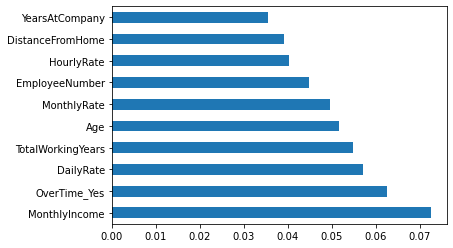

In [227]:
important_features = pd.Series(rf_clf.feature_importances_, index=X.columns)
important_features.nlargest(10).plot(kind='barh')

<Figure size 1080x720 with 0 Axes>

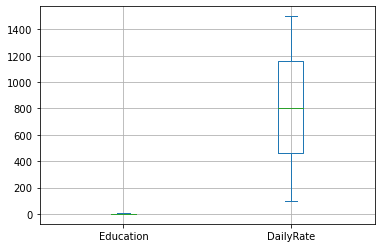

<Figure size 1080x720 with 0 Axes>

In [205]:
bp=pd.DataFrame(X, columns=['Education','DailyRate'])
bp.plot.box(grid='True')
plt.figure(figsize=(15,10))

In [189]:
skew(X["Age"].dropna())

0.41286446154785084

<AxesSubplot:>

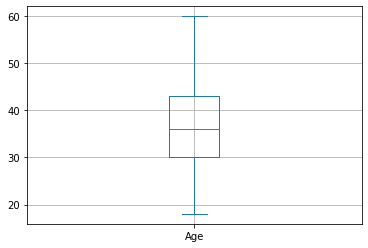

In [185]:
bp=pd.DataFrame(X, columns=['Age'])
bp.plot.box(grid='True')

In [ ]:
df.skew(axis = 1, skipna = True)

In [187]:
skew(X["DailyRate"].dropna())

-0.003514976958291024

<AxesSubplot:>

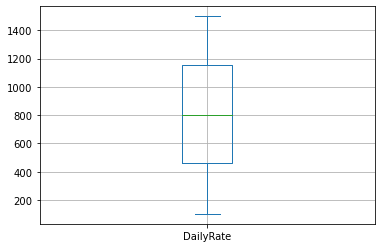

In [188]:
bp=pd.DataFrame(X, columns=['DailyRate'])
bp.plot.box(grid='True')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cent

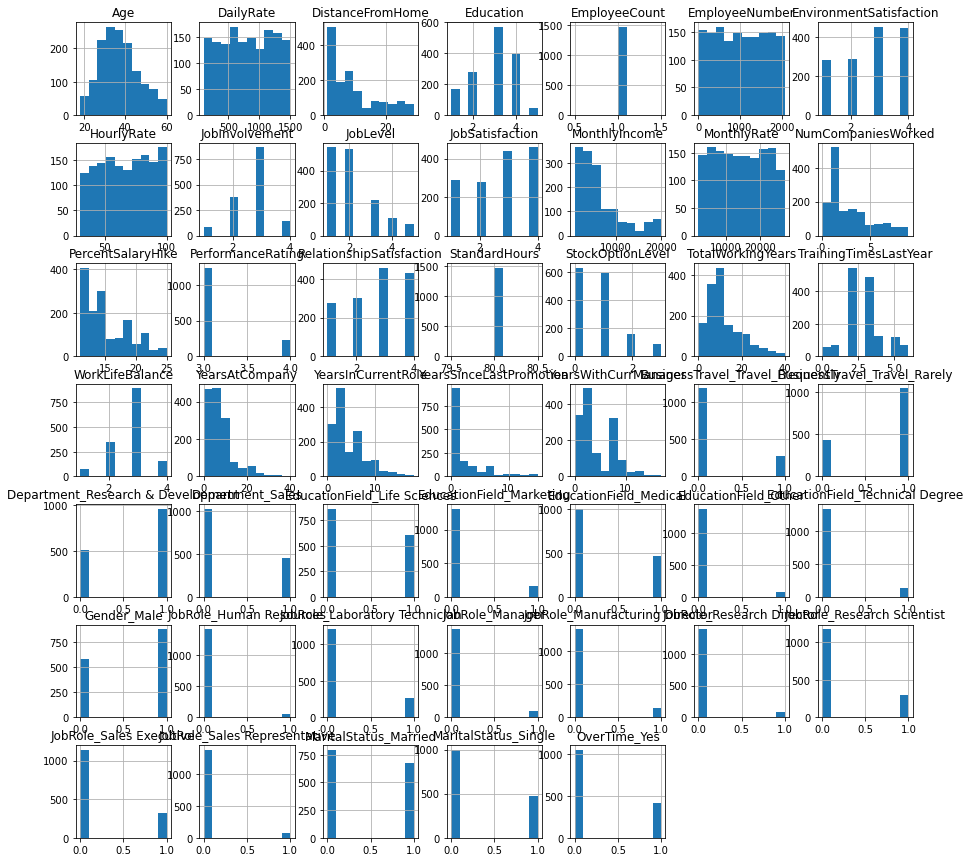

In [200]:
X.hist(figsize=(15,15))

In [77]:
y =  labels['Attrition'].map({'Yes': 1, 'No': 0})
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [278]:
X.apply(stats.zscore)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,NaN,-1.701283,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,NaN,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,NaN,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,NaN,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,NaN,-1.696298,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,NaN,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,NaN,-1.694636,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,NaN,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,NaN,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,NaN,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,NaN,1.721670,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,-0.284329,0.523316,0.489376,-0.426230,0.266233,NaN,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873,2.075297,-1.562889,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
1466,0.227347,-0.469754,-0.393938,-1.868426,NaN,1.723332,1.169781,-1.175601,-1.026167,0.845911,-1.567907,0.741140,1.004010,0.523316,-0.057267,-0.426230,-1.584178,NaN,0.241988,-0.293077,1.707500,0.338096,-0.

In [265]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(X)

print(normalized_data)

[[0.54761905 0.71581961 0.         ... 0.         1.         1.        ]
 [0.73809524 0.12670007 0.25       ... 1.         0.         0.        ]
 [0.45238095 0.90980673 0.03571429 ... 0.         1.         1.        ]
 ...
 [0.21428571 0.03793844 0.10714286 ... 1.         0.         1.        ]
 [0.73809524 0.65926986 0.03571429 ... 1.         0.         0.        ]
 [0.38095238 0.37652112 0.25       ... 1.         0.         0.        ]]


In [279]:
scaleddata=scaler.transform(X)

In [280]:
scaleddata

array([[0.54761905, 0.71581961, 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.73809524, 0.12670007, 0.25      , ..., 1.        , 0.        ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 1.        , 0.        ,
        1.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 1.        , 0.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 1.        , 0.        ,
        0.        ]])

In [268]:
scaleddf = pd.DataFrame(data=scaleddata,columns=X.columns)

In [269]:
scaleddf

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.0,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.0,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.0,0.996613,0.666667,0.157143,1.000000,0.25,1.000000,0.082254,0.409396,0.444444,0.428571,0.0,0.666667,0.0,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,0.500000,0.365784,0.178571,0.00,0.0,0.997097,1.000000,0.171429,0.333333,0.50,0.000000,0.472986,0.777474,0.444444,0.285714,0.0,0.000000,0.0,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,0.214286,0.037938,0.107143,0.50,0.0,0.998065,0.333333,0.814286,1.000000,0.25,0.333333,0.270300,0.123670,0.111111,0.642857,1.0,0.333333,0.0,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,0.738095,0.659270,0.035714,0.50,0.0,0.998549,1.000000,0.471429,0.333333,0.25,0.333333,0.230700,0.447661,0.222222,0.214286,0.0,1.000000,0.0,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [271]:
from sklearn.model_selection import train_test_split
scaleddf_train, scaleddf_test, y_train, y_test = train_test_split(scaleddf, y, test_size = 0.20, random_state = 42)

In [272]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 40, random_state = 42)
rf_clf.fit(scaleddf_train, y_train)
pred = rf_clf.predict(scaleddf_test)

In [273]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,pred ))
print(accuracy_score(y_test, pred ))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.50      0.08      0.13        39

    accuracy                           0.87       294
   macro avg       0.69      0.53      0.53       294
weighted avg       0.83      0.87      0.82       294

0.8673469387755102


<AxesSubplot:>

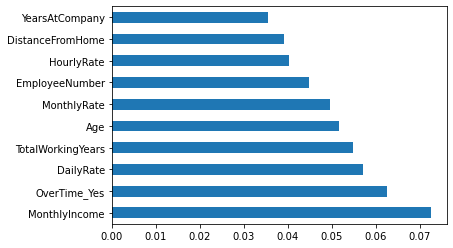

In [274]:
important_features = pd.Series(rf_clf.feature_importances_, index=scaleddf.columns)
important_features.nlargest(10).plot(kind='barh')

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [41]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [43]:
for a,b in zip([lr,dt,knn,svm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    train_acc="[%s] training data accuracy is : %f" % (b,score1)
    test_acc="[%s] test data accuracy is : %f" % (b,score)
    print(train_acc)
    print(test_acc)

[Logistic Regression] training data accuracy is : 0.892857
[Logistic Regression] test data accuracy is : 0.901361
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.768707
[KNN] training data accuracy is : 0.885204
[KNN] test data accuracy is : 0.812925
[SVM] training data accuracy is : 0.843537
[SVM] test data accuracy is : 0.863946
[Naive Bayes] training data accuracy is : 0.779762
[Naive Bayes] test data accuracy is : 0.789116


In [44]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.9013605442176871,
 'KNN classifier': 0.8129251700680272,
 'Support Vector Machine': 0.8639455782312925,
 'Decision tree': 0.7687074829931972,
 'Naive Bayes': 0.7891156462585034}

In [45]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,pred ))
print(accuracy_score(y_test, pred ))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294

0.8707482993197279


In [46]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Decision tree,Naive Bayes
accuracy,0.901361,0.812925,0.863946,0.768707,0.789116


<AxesSubplot:>

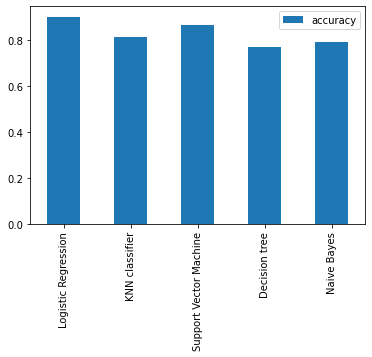

In [49]:
model_compare.T.plot(kind='bar') 

In [119]:
df1=pd.read_csv(r"C:\Users\Q195\Downloads\employee_attrition.csv")

In [120]:
df1

,EmployeeID,TotalMonthsOfExp,TotalOrgsWorked,MonthsInOrg,LastPayIncrementBand,AverageFeedback,LastPromotionYears,Attrition
0,1,110,4,9,5,4,4,1
1,2,103,3,51,1,4,2,0
2,3,41,4,16,5,4,4,1
3,4,32,4,17,5,2,3,0
4,5,80,3,16,3,4,2,0
...,...,...,...,...,...,...,...,...
995,996,44,1,9,3,1,2,0
996,997,6,2,5,2,1,1,0
997,998,29,3,1,3,4,2,0
998,999,92,2,7,1,2,4,1


In [121]:
a = df1.to_numpy().astype(float)
X_train = a[:,1:7]
Y_train=a[:,7]
Y_train = tf.keras.utils.to_categorical(Y_train,2)

print("X-Train Shape : ", X_train.shape)
print("Y-Train Shape : ", Y_train.shape)

X-Train Shape :  (1000, 6)
Y-Train Shape :  (1000, 2)


In [107]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

#Setup hyperparameters for deep learning
EPOCHS=100
BATCH_SIZE=100
VERBOSE=1
NB_CLASSES=2
N_HIDDEN=128
VALIDATION_SPLIT=0.2

#Create a Keras model
model = tf.keras.models.Sequential()

#Add first hidden Dense layer
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(6,),
                              name='Dense-Layer-1',
                              activation='relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                              name='Dense-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Final',
                             activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

Epoch 1/100
8/8 [==============================] - 2s 26ms/step - loss: 1.3177 - accuracy: 0.6413 - val_loss: 1.3407 - val_accuracy: 0.7800
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.8973 - accuracy: 0.6562 - val_loss: 0.5812 - val_accuracy: 0.7700
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.7700 - val_loss: 0.6084 - val_accuracy: 0.6750
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5698 - accuracy: 0.7462 - val_loss: 0.4965 - val_accuracy: 0.7750
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5359 - accuracy: 0.7750 - val_loss: 0.4944 - val_accuracy: 0.7750
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4866 - accuracy: 0.7937 - val_loss: 0.4699 - val_accuracy: 0.7750
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4551 - accuracy: 0.8037 - val_loss: 0.4752 - val_accuracy: 0.7750
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.1625 - accuracy: 0.9438 - val_loss: 0.1803 - val_accuracy: 0.9300
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1585 - accuracy: 0.9425 - val_loss: 0.1913 - val_accuracy: 0.8950
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1526 - accuracy: 0.9538 - val_loss: 0.1990 - val_accuracy: 0.8700
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1916 - accuracy: 0.9125 - val_loss: 0.2214 - val_accuracy: 0.8900
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1846 - accuracy: 0.9250 - val_loss: 0.3126 - val_accuracy: 0.8250
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2567 - accuracy: 0.8925 - val_loss: 0.1831 - val_accuracy: 0.9000
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1910 - accuracy: 0.9187 - val_loss: 0.2523 - val_accuracy: 0.8750
Epoch 66/100
8/8 [===============

In [109]:
TotalMonthsOfExp=38
TotalOrgsWorked=12
MonthsInOrg=2
LastPayIncrementBand=0
AverageFeedback=3
LastPromotionYears=0

print("Will employee leave ?")

prediction= np.argmax(model.predict([[TotalMonthsOfExp,
                                  TotalOrgsWorked,
                                  MonthsInOrg,
                                  LastPayIncrementBand,
                                  AverageFeedback,
                                  LastPromotionYears]]), axis=1)
print(prediction)

Will employee leave ?
[0]


In [117]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [122]:
X,y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [123]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='r2', verbose=1)